<a href="https://colab.research.google.com/github/MateuszZajaczek/DSP/blob/main/Lab3_MZajaczek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Digital Filter Design and Analysis: Implementing FIR and IIR filters in Python. 6. Adaptive Filtering: Applying adaptive filtering algorithms to noise reduction.

## FIR implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(x, b):
    """
    Ręczna implementacja filtra FIR (splot).
    """
    N = len(b)
    y = np.zeros(len(x))
    for n in range(len(x)):
        for k in range(N):
            if n - k >= 0:
                y[n] += b[k] * x[n - k]
    return y

## FIR using scipy.signal library

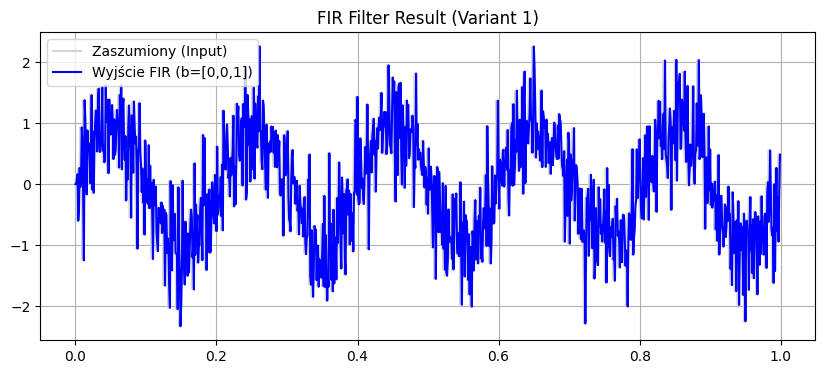

In [2]:
from scipy.signal import lfilter, freqz

# --- DANE WARIANTU 1 (FIR) ---
# FIR Filter Coefficients: b = {0, 0, 1}
b = np.array([0, 0, 1])
a = np.array([1]) # Dla FIR mianownik to zawsze 1

# Generowanie sygnału testowego (zaszumiona sinusoida)
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
d = np.sin(2 * np.pi * 5 * t)       # Czysty sygnał
noise = np.random.normal(0, 0.5, len(t))
x = d + noise                       # Sygnał wejściowy

# Filtracja (przy użyciu biblioteki scipy lub naszej funkcji)
y_fir = lfilter(b, a, x)

# Wizualizacja
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Zaszumiony (Input)', color='lightgray')
plt.plot(t, y_fir, label='Wyjście FIR (b=[0,0,1])', color='blue')
plt.title("FIR Filter Result (Variant 1)")
plt.legend()
plt.grid(True)
plt.show()

## IIR Filter implementation

In [3]:
def iir_filter(x, b, a):
    """
    Ręczna implementacja filtra IIR.
    """
    y = np.zeros(len(x))
    for n in range(len(x)):
        # Część Feedforward (b)
        for k in range(len(b)):
            if n - k >= 0:
                y[n] += b[k] * x[n - k]

        # Część Feedback (a) - pomijamy a[0], które jest równe 1
        for m in range(1, len(a)):
            if n - m >= 0:
                y[n] -= a[m] * y[n - m]
    return y

## IIR implementation using scipy.signal

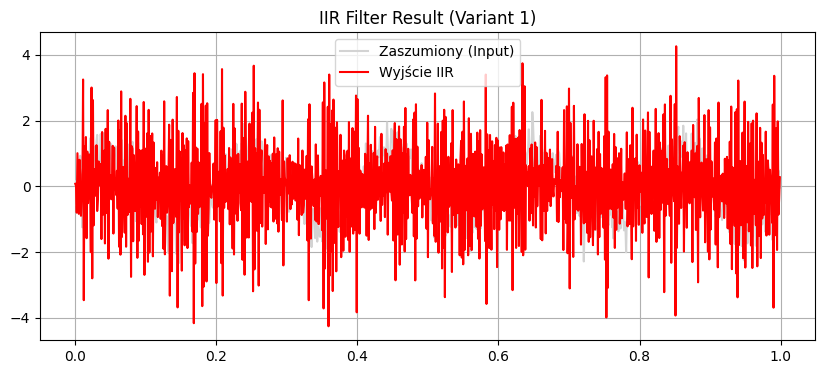

In [4]:
# --- DANE WARIANTU 1 (IIR) ---
# IIR Filter Coefficients
b_iir = np.array([1, -1.5, 0.7])
a_iir = np.array([1, 0.5, 0.1])

# Filtracja (korzystamy z tego samego sygnału x co wyżej)
y_iir = lfilter(b_iir, a_iir, x)

# Wizualizacja
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Zaszumiony (Input)', color='lightgray')
plt.plot(t, y_iir, label='Wyjście IIR', color='red')
plt.title("IIR Filter Result (Variant 1)")
plt.legend()
plt.grid(True)
plt.show()

## Adaptive LMS Filter Implementation

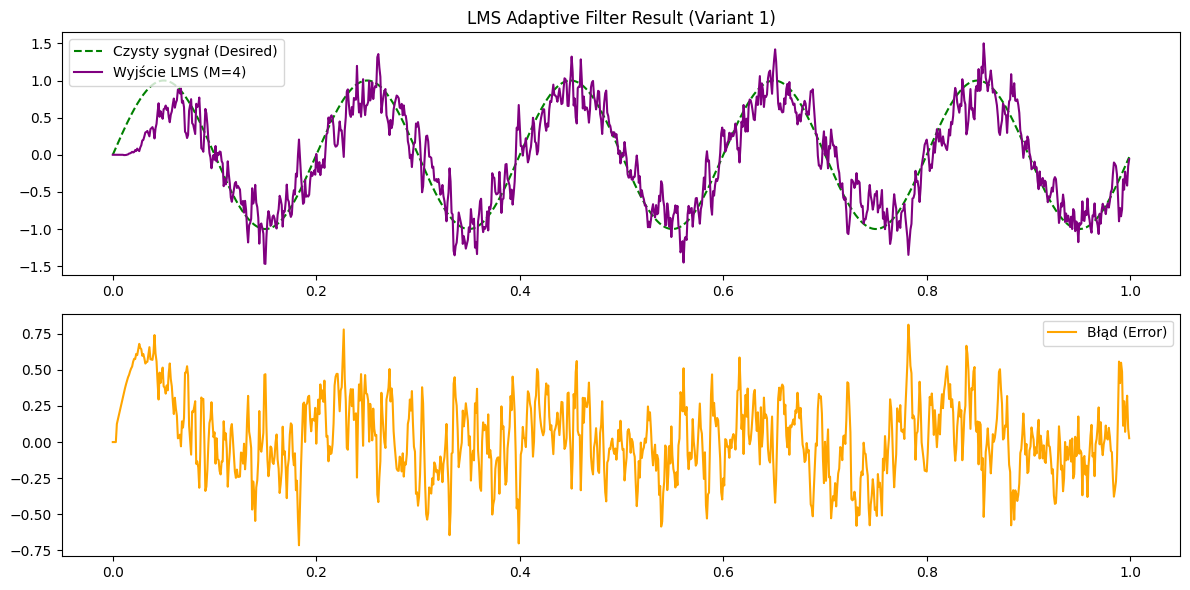

Końcowe wagi filtra: [0.20524749 0.21166172 0.20914963 0.19535134]


In [5]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)

    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment

    return y, e, w

# --- DANE WARIANTU 1 (LMS) ---
# Step size µ = 0.01, filter length M = 4
mu = 0.01
num_taps = 4

# Uruchomienie filtra
y_lms, e, w = lms_filter(x, d, mu, num_taps)

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, d, label="Czysty sygnał (Desired)", color='green', linestyle='--')
plt.plot(t, y_lms, label=f"Wyjście LMS (M={num_taps})", color='purple')
plt.legend()
plt.title("LMS Adaptive Filter Result (Variant 1)")

plt.subplot(2, 1, 2)
plt.plot(t, e, label="Błąd (Error)", color='orange')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Końcowe wagi filtra: {w}")